# Assignment 4

This assignment is about data processing and plotting.

## How to hand in

The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. The assignment should fit in a single Jupyter Notebook.

Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook 12-Assignments for more information.

## Use pandas dataframe with poverty data

Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook. With the help of Pandas' DataFrame do the following

1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)
2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart
3. Show the development of absolute poverty in all the central american countries. Hand in:
    - A description of what graphical representation you think is best for this task
        - See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html
    - The actual graphical representation in a Jupyter Notebook
4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
    - A description of why that question is interesting
    - A visualisation of the question in your Jupyter Notebook
        - See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html

In [1]:
import pandas as pd
import requests
import zipfile
from glob import glob

# url with data
url = 'http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv'
# downloading data
response = requests.get(url)
# extracting filename
fname = response.headers['Content-Disposition'].split('=')[1]
if response.ok:  # status_code == 200:
    # opens the file
    with open(fname, 'wb') as f:
        f.write(response.content)
# unpacking zip
zipfile.ZipFile(fname, 'r').extractall('.')
# finding the file
local_file = glob('./*API*.csv')[0]
print(local_file)

.\API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv


In [2]:
# reads file, skips first 4 rows
df = pd.read_csv(local_file,skiprows=4)
# setting collumn 'Country Name' as index
df.set_index('Country Name',inplace=True)

### 1 Create a line graph showing the development in poverty over time in both Argentina, Ivory coast, USA.

Populating the interactive namespace from numpy and matplotlib


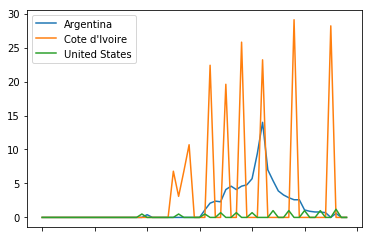

In [6]:
%pylab inline

# extracting data
argentina = df.loc['Argentina',"1960":"2018"]
ivory_coast = df.loc['Cote d\'Ivoire',"1960":"2018"]
usa = df.loc['United States',"1960":"2018"]

# fillna(0) replaces nan's with 0's.
# need to be plotted correctly
argentina = argentina.fillna(0)
ivory_coast = ivory_coast.fillna(0)
usa = usa.fillna(0)

# plotting data
argentina.plot()
ivory_coast.plot()
usa.plot()

# adding legend
matplotlib.pyplot.legend(['Argentina','Cote d\'Ivoire','United States'])

### 2 Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart.

### 3 Show the development of absolute poverty in all the central american countries.

### 4 From the worldbank api, find one more interesting question you would like to ask.